In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 97% 63.0M/65.2M [00:03<00:00, 25.6MB/s]
100% 65.2M/65.2M [00:03<00:00, 20.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#**Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

#**Displaying Images**

In [ ]:
picture_size = 48
folder_path = "/content/images/"

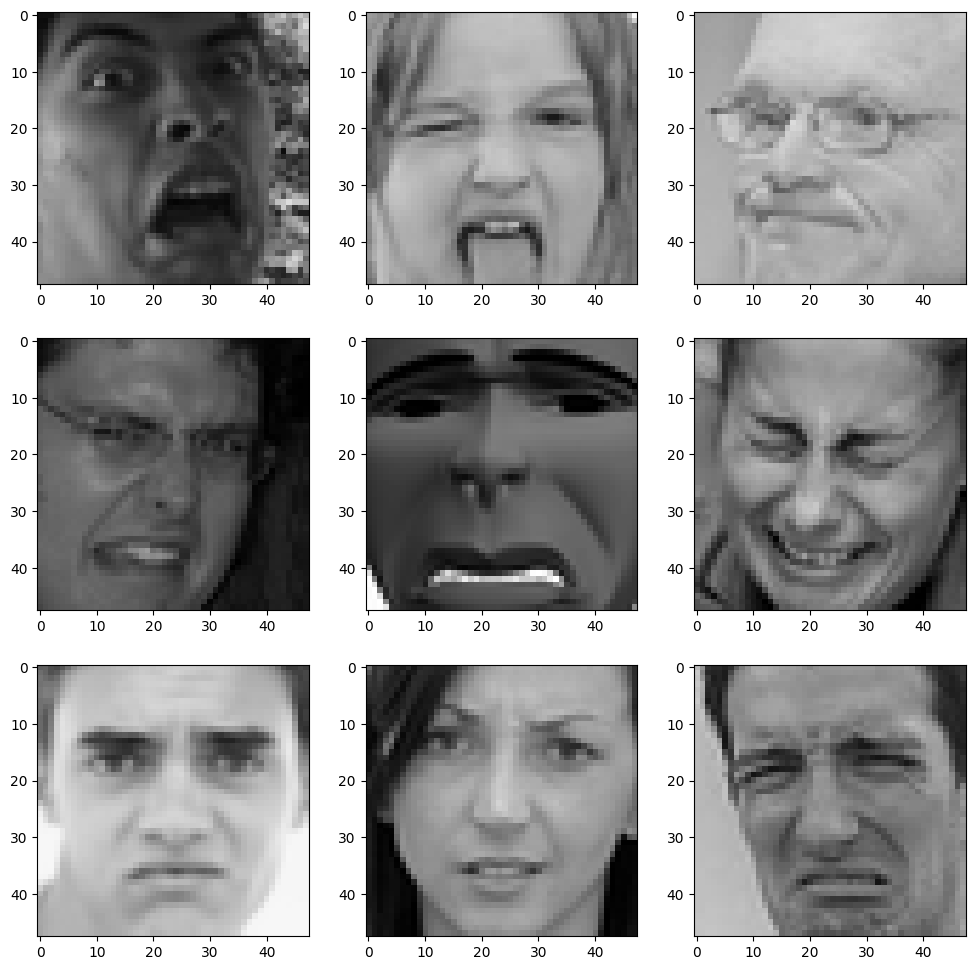

In [ ]:
expression = 'disgusted'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

#**Making Training and validation data**

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#**Model Building**

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

#**Fitting the Model with Training and Validation Data**

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-10-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


224/224 [==============================] - ETA: 0s - loss: 1.8064 - accuracy: 0.3008

224/224 [==============================] - 31s 83ms/step - loss: 1.8064 - accuracy: 0.3008 - val_loss: 1.6554 - val_accuracy: 0.3682 - lr: 0.0010
Epoch 2/48
224/224 [==============================] - ETA: 0s - loss: 1.4455 - accuracy: 0.4465

224/224 [==============================] - 19s 87ms/step - loss: 1.4455 - accuracy: 0.4465 - val_loss: 1.4134 - val_accuracy: 0.4576 - lr: 0.0010
Epoch 3/48
224/224 [==============================] - ETA: 0s - loss: 1.2806 - accuracy: 0.5107

224/224 [==============================] - 22s 97ms/step - loss: 1.2806 - accuracy: 0.5107 - val_loss: 1.3631 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 4/48
224/224 [==============================] - ETA: 0s - loss: 1.1864 - accuracy: 0.5479

224/224 [==============================] - 17s 74ms/step - loss: 1.1864 - accuracy: 0.5479 - val_loss: 1.3460 - val_accuracy: 0.4806 - lr: 0.0010
Epoch 5/48
224/224 [==============================] - ETA: 0s - loss: 1.1236 - accuracy: 0.5745

224/224 [==============================] - 17s 74ms/step - loss: 1.1236 - accuracy: 0.5745 - val_loss: 1.2355 - val_accuracy: 0.5244 - lr: 0.0010
Epoch 6/48
224/224 [==============================] - ETA: 0s - loss: 1.0719 - accuracy: 0.5918

224/224 [==============================] - 17s 74ms/step - loss: 1.0719 - accuracy: 0.5918 - val_loss: 1.1270 - val_accuracy: 0.5717 - lr: 0.0010
Epoch 7/48
224/224 [==============================] - ETA: 0s - loss: 1.0245 - accuracy: 0.6108

224/224 [==============================] - 20s 87ms/step - loss: 1.0245 - accuracy: 0.6108 - val_loss: 1.0632 - val_accuracy: 0.5949 - lr: 0.0010
Epoch 8/48
224/224 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.6314

224/224 [==============================] - 21s 91ms/step - loss: 0.9781 - accuracy: 0.6314 - val_loss: 1.2062 - val_accuracy: 0.5463 - lr: 0.0010
Epoch 9/48
224/224 [==============================] - ETA: 0s - loss: 0.9407 - accuracy: 0.6456

224/224 [==============================] - 17s 75ms/step - loss: 0.9407 - accuracy: 0.6456 - val_loss: 1.2445 - val_accuracy: 0.5490 - lr: 0.0010
Epoch 10/48
224/224 [==============================] - ETA: 0s - loss: 0.9020 - accuracy: 0.6564Restoring model weights from the end of the best epoch: 7.



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 17s 76ms/step - loss: 0.9020 - accuracy: 0.6564 - val_loss: 1.2268 - val_accuracy: 0.5412 - lr: 0.0010
Epoch 10: early stopping


#**Plotting Accuracy & Loss**

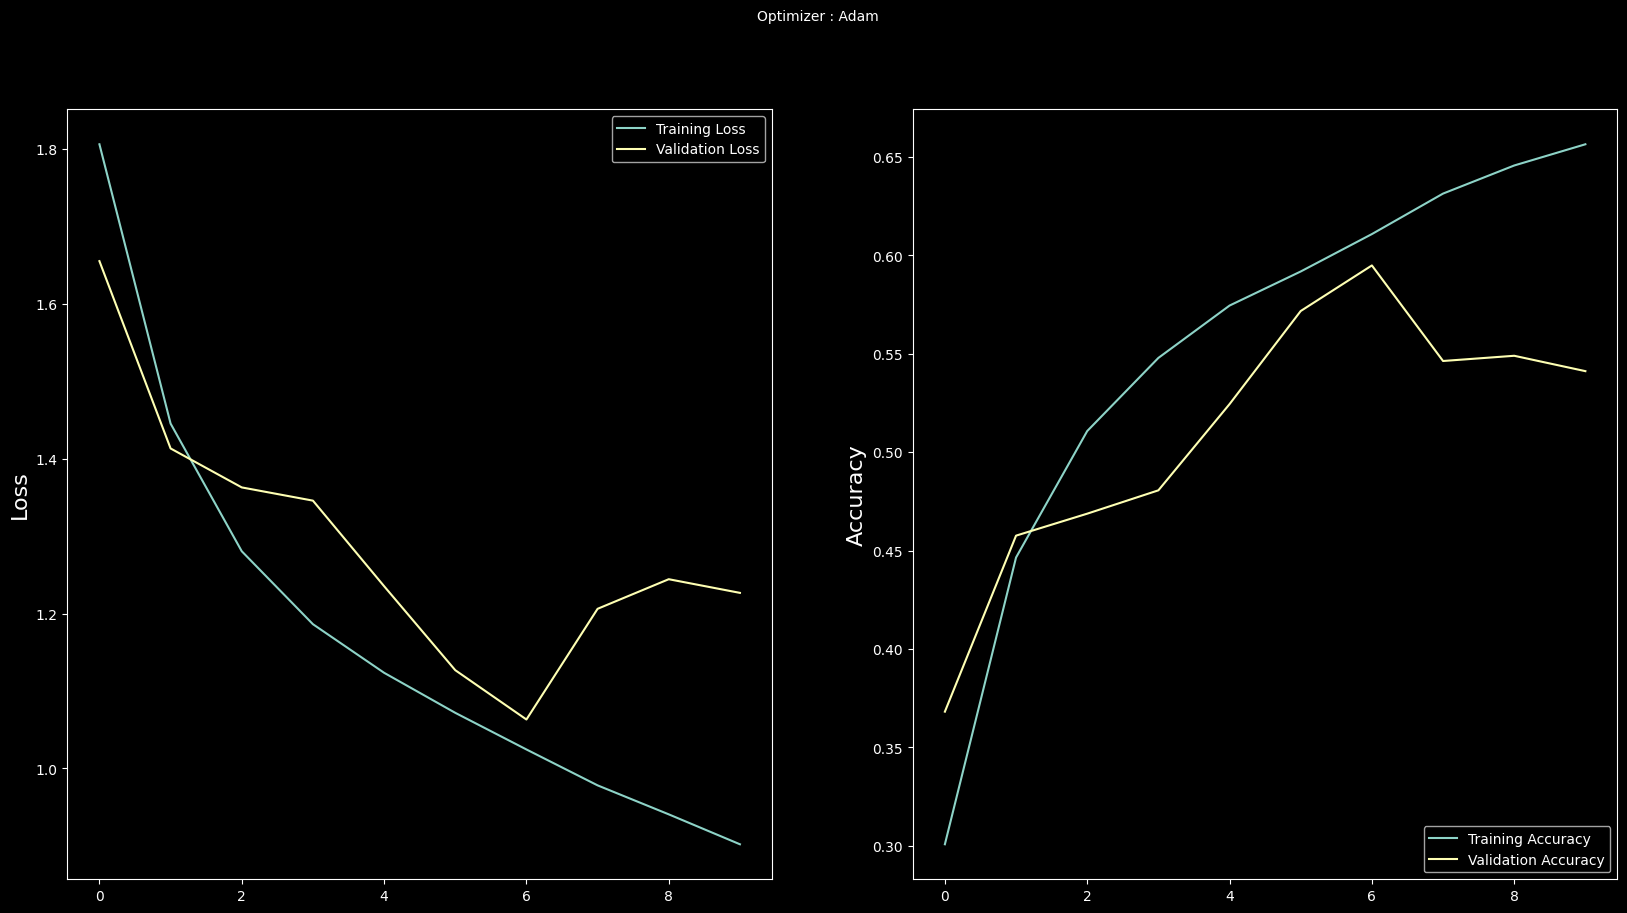

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('/content/model/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#**Predict The Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('/content/model.h5')

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/test/angry/im0.png')

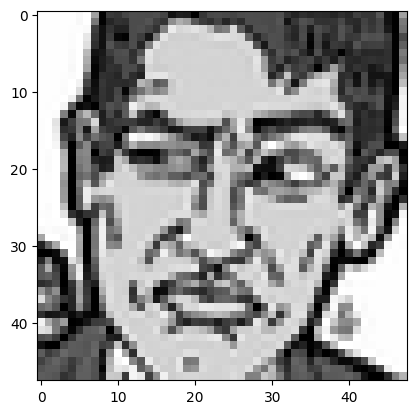

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(48, 48, 3)

In [ ]:
model.predict(test_img)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(None, 48, 3)


In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the saved model
model = load_model('/content/model.h5')

# Load the image in color
test_img = cv2.imread('/content/test/angry/im0.png')

# Convert the image to grayscale
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

# Resize the image to match the expected input size of the model
resized_img = cv2.resize(gray_img, (48, 48))

# Reshape the image to match the input shape of the model
input_img = np.expand_dims(resized_img, axis=0)
input_img = np.expand_dims(input_img, axis=-1)

# Normalize the image data
input_img = input_img / 255.0

# Make prediction
prediction = model.predict(input_img)

# Display the prediction
print(prediction)


1/1 [==============================] - 0s 148ms/step
[[0.25690222 0.01397371 0.10661849 0.09498718 0.14865872 0.28512326
  0.0937364 ]]
